# Lagrange-Interpolationspolynom

- Gegeben sind $n$ Punkte einer unbekannten Funktion $y = f(x)$
- Gesucht ist das Interpolationspolynom $P_n(x)$, dass an den gegebenen Punkten mit $f(x)$ übereinstimmt.

In [1]:
# input given points
points = [
    (0, 2),
    (1, 2),
    (2, 1),
    (3, -1),
]
#

In [2]:
n = len(points)
X = [p[0] for p in points]
Y = [p[1] for p in points]

$$L_{n,k} = \frac{(x - x_0) \cdots (x - x_{k-1}) \cdot (x - x_{k+1}) \cdots (x - x_n)}
{(x_k - x_0) \cdots (x_k - x_{k-1}) \cdot (x_k - x_{k+1}) \cdots (x_k - x_n)}$$

In [3]:
L = []
var('x')
for k in range(n):
    Lnk = (prod([(x - X[i]) for i in range(len(X)) if i != k])) / (prod([(X[k] - X[i]) for i in range(len(X)) if i != k]))
    L.append(Lnk.simplify_full())

In [4]:
for i, l in enumerate(L):
    show(LatexExpr(r"L_{{ {}, {} }} = ".format(n, i)), l)

L_{ 4, 0 } =  -1/6*x^3 + x^2 - 11/6*x + 1

L_{ 4, 1 } =  1/2*x^3 - 5/2*x^2 + 3*x

L_{ 4, 2 } =  -1/2*x^3 + 2*x^2 - 3/2*x

L_{ 4, 3 } =  1/6*x^3 - 1/2*x^2 + 1/3*x

$$P_n(x) = \sum_{k=0}^{n} f(x_k) \cdot L_{n,k}$$

In [5]:
P = sum([Y[k] * L[k] for k in range(n)])
show(P.simplify_full())

-1/2*x^2 + 1/2*x + 2

In [6]:
# some sanity checking
for k in range(n):
    yc = P.subs(x=X[k])
    yg = Y[k]
    assert yc == yg, "computed y {} != {} given y".format(yc, yg)

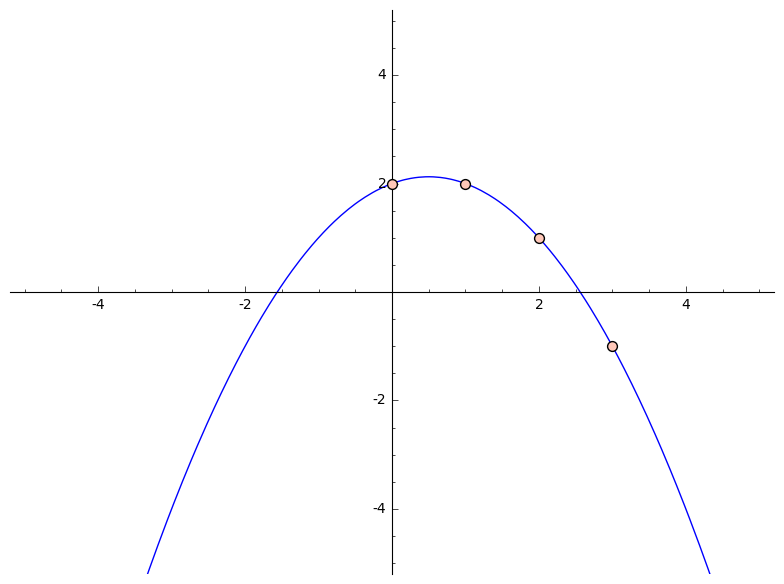

In [7]:
R = max(max((p[0], p[1])) for p in points) + 2
scatter_plot(points) + plot(P, xmax=R, ymax=R, ymin=-R, xmin=-R)